# Human Activity Recognition

In [1]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Dataset

In [2]:
train = shuffle(pd.read_csv('datasets/train.csv'))
test = shuffle(pd.read_csv('datasets/test.csv'))

In [3]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4292,0.250006,-0.019057,-0.100084,-0.933776,-0.970313,-0.944679,-0.935013,-0.968011,-0.937451,-0.892648,...,-0.807408,-0.037278,-0.122766,-0.348601,0.328199,0.404954,-0.364881,-0.622436,21,LAYING
472,0.386490,-0.046074,-0.119968,-0.100786,-0.203148,-0.466106,-0.133075,-0.190999,-0.425629,0.461942,...,-0.843139,-0.752253,-0.040793,-0.992886,-0.633710,-0.776713,0.242460,0.074147,3,WALKING_DOWNSTAIRS
6284,0.244531,-0.106908,-0.095900,-0.888546,-0.489103,-0.736287,-0.910522,-0.484449,-0.715743,-0.650148,...,-0.368824,-0.001859,0.224113,-0.309310,-0.800226,-0.844055,0.204227,-0.002262,28,STANDING
3579,0.263145,-0.000314,-0.134059,-0.245274,0.061708,-0.395267,-0.273097,0.057574,-0.395110,-0.273203,...,-0.852234,0.223319,0.244534,0.718003,0.654686,-0.551356,0.365299,0.173387,17,WALKING_UPSTAIRS
3186,0.197885,-0.014342,-0.099409,-0.393759,-0.335486,-0.101012,-0.399046,-0.403403,-0.051810,-0.364040,...,-0.753009,0.883343,0.010091,-0.273151,0.368868,-0.784958,0.015027,0.148880,16,WALKING


In [4]:
train.tail(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
627,0.326145,-0.043925,-0.129278,-0.275163,-0.09946,-0.380906,-0.292921,-0.115754,-0.379459,-0.097328,...,-0.547917,-0.541749,0.698895,0.750461,0.32339,-0.708911,0.262882,0.136065,3,WALKING


In [5]:
train.shape

(7352, 563)

In [6]:
test.shape

(2947, 563)

### Check for missing values

In [7]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


### Exploring the Dataset

In [8]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Exploratory Data Analysis

In [9]:
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [11]:
df.head(2)

,labels,values
0,LAYING,1407
1,STANDING,1374


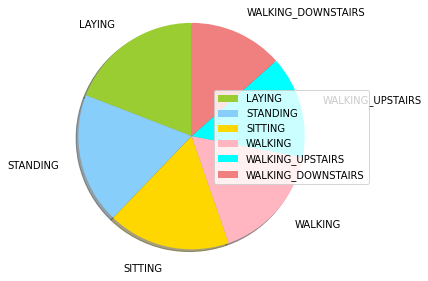

In [12]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Data Processing

In [13]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [15]:
y_train

array([0, 4, 2, ..., 0, 3, 3])

In [16]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [17]:
y_test

array([5, 5, 3, ..., 0, 5, 3])

In [18]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model Building for Human Acitivity Recognition

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [20]:
y_pred = knn.predict(x_test)

In [21]:
print((accuracy_score(y_test, y_pred)*100), '%')

89.98982015609094 %


In [24]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

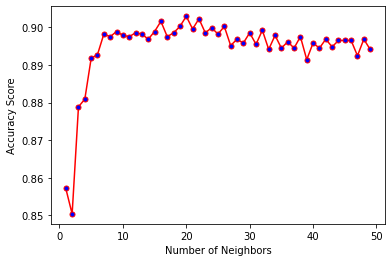

In [25]:

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [26]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


### Conclusion

In [27]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [28]:
y_pred_label

['WALKING_UPSTAIRS',
 'WALKING',
 'WALKING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'LAYING',
 'SITTING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'STANDING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'WALKING_UPSTAIRS',
 'WALKING_UPSTAIRS',
 'STANDING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'LAYING',
 'WALKING',
 'SITTING',
 'STANDING',
 'SITTING',
 'STANDING',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'SITTING',
 'WALKING',
 'LAYING',
 'LAYING',
 'WALKING',
 'STANDING',
 'LAYING',
 'LAYING',
 'STANDING',
 'STANDING',
 'LAYING',
 'LAYING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'STANDING',
 'LAYING',
 'STANDING',
 'STANDING',
 'SITTING',
 'SITTING',
 'LAYING',
 'LAYING',
 'LAYING',
 'STANDING',
 'LAYING',
 'STANDING',
 '

In [29]:
print(confusion_matrix(Y_test_label, y_pred_label))

[[513  13  11   0   0   0]
 [  3 390  97   0   0   1]
 [  0  22 510   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  45 327  48]
 [  0   0   0  39   1 431]]


In [30]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

